In [0]:
from time import time,sleep
from random import randint
from IPython.core.display import clear_output
from requests import get
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen as uReq
import lxml.html as lh
import requests
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from numpy import *
from fbprophet import Prophet

In [0]:
url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [0]:
url_cnf = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [0]:
# for confirmed cases overall
cnf = uReq(url_cnf)
pg_cnf = requests.get(url_cnf)
doc_cnf = lh.fromstring(pg_cnf.content)
cnf_elements = doc_cnf.xpath('//tr')
cnf.close()

In [5]:
# for deaths overall
client = uReq(url)
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
client.close()
# for deaths
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col.append((name,[]))
# for deaths 

for j in range(1,len(tr_elements)):
   T=tr_elements[j]
   i=0
   for t in T.iterchildren():
        data=t.text_content() 
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1
Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)

1:""
2:"Province/State"
3:"Country/Region"
4:"Lat"
5:"Long"
6:"1/22/20"
7:"1/23/20"
8:"1/24/20"
9:"1/25/20"
10:"1/26/20"
11:"1/27/20"
12:"1/28/20"
13:"1/29/20"
14:"1/30/20"
15:"1/31/20"
16:"2/1/20"
17:"2/2/20"
18:"2/3/20"
19:"2/4/20"
20:"2/5/20"
21:"2/6/20"
22:"2/7/20"
23:"2/8/20"
24:"2/9/20"
25:"2/10/20"
26:"2/11/20"
27:"2/12/20"
28:"2/13/20"
29:"2/14/20"
30:"2/15/20"
31:"2/16/20"
32:"2/17/20"
33:"2/18/20"
34:"2/19/20"
35:"2/20/20"
36:"2/21/20"
37:"2/22/20"
38:"2/23/20"
39:"2/24/20"
40:"2/25/20"
41:"2/26/20"
42:"2/27/20"
43:"2/28/20"
44:"2/29/20"
45:"3/1/20"
46:"3/2/20"
47:"3/3/20"
48:"3/4/20"
49:"3/5/20"
50:"3/6/20"
51:"3/7/20"
52:"3/8/20"
53:"3/9/20"
54:"3/10/20"
55:"3/11/20"
56:"3/12/20"
57:"3/13/20"
58:"3/14/20"
59:"3/15/20"
60:"3/16/20"
61:"3/17/20"
62:"3/18/20"
63:"3/19/20"
64:"3/20/20"
65:"3/21/20"
66:"3/22/20"
67:"3/23/20"
68:"3/24/20"
69:"3/25/20"
70:"3/26/20"
71:"3/27/20"
72:"3/28/20"
73:"3/29/20"
74:"3/30/20"
75:"3/31/20"
76:"4/1/20"
77:"4/2/20"
78:"4/3/20"
79:"4/4/20"
80:"

In [6]:
df.head()

,,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,,,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64,68,72,85,90,95,104,106,109,115,120
1,,,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31,31,31,31,31,31,31,31,31,31,31
2,,,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450,453,459,463,465,470,476,483,488,494,502
3,,,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26,26,29,29,31,33,33,35,35,36,37,37,37,37,40,40,40,40,41,42,42,43,44,45,45,46,46,47,47,48,48
4,,,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [7]:
# for confirmed cases
col_cnf=[]
i=0
#For each row, store each first element (header) and an empty list
for t in cnf_elements[0]:
    i+=1
    name=t.text_content()
    print ('%d:"%s"'%(i,name))
    col_cnf.append((name,[]))

1:""
2:"Province/State"
3:"Country/Region"
4:"Lat"
5:"Long"
6:"1/22/20"
7:"1/23/20"
8:"1/24/20"
9:"1/25/20"
10:"1/26/20"
11:"1/27/20"
12:"1/28/20"
13:"1/29/20"
14:"1/30/20"
15:"1/31/20"
16:"2/1/20"
17:"2/2/20"
18:"2/3/20"
19:"2/4/20"
20:"2/5/20"
21:"2/6/20"
22:"2/7/20"
23:"2/8/20"
24:"2/9/20"
25:"2/10/20"
26:"2/11/20"
27:"2/12/20"
28:"2/13/20"
29:"2/14/20"
30:"2/15/20"
31:"2/16/20"
32:"2/17/20"
33:"2/18/20"
34:"2/19/20"
35:"2/20/20"
36:"2/21/20"
37:"2/22/20"
38:"2/23/20"
39:"2/24/20"
40:"2/25/20"
41:"2/26/20"
42:"2/27/20"
43:"2/28/20"
44:"2/29/20"
45:"3/1/20"
46:"3/2/20"
47:"3/3/20"
48:"3/4/20"
49:"3/5/20"
50:"3/6/20"
51:"3/7/20"
52:"3/8/20"
53:"3/9/20"
54:"3/10/20"
55:"3/11/20"
56:"3/12/20"
57:"3/13/20"
58:"3/14/20"
59:"3/15/20"
60:"3/16/20"
61:"3/17/20"
62:"3/18/20"
63:"3/19/20"
64:"3/20/20"
65:"3/21/20"
66:"3/22/20"
67:"3/23/20"
68:"3/24/20"
69:"3/25/20"
70:"3/26/20"
71:"3/27/20"
72:"3/28/20"
73:"3/29/20"
74:"3/30/20"
75:"3/31/20"
76:"4/1/20"
77:"4/2/20"
78:"4/3/20"
79:"4/4/20"
80:"

In [0]:
# for confirmed cases

for j in range(1,len(cnf_elements)):
   T=cnf_elements[j]
   i=0
   for t in T.iterchildren():
        data=t.text_content() 
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col_cnf[i][1].append(data)
        #Increment i for the next column
        i+=1

In [0]:
d={title:column for (title,column) in col_cnf}
cnf=pd.DataFrame(d)
cnf.to_csv('time_series_cnf.csv')

In [10]:
cnf

,,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20
0,,,Afghanistan,33.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402
1,,,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868
2,,,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723
3,,,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755
4,,,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,,,Western Sahara,24.2155,-12.8858,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,4,4,4,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
262,,,Sao Tome and Principe,0.18636,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208
263,,,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51
264,,,Comoros,-11.6455,43.3333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11


In [0]:
col = ['Country/Region','Lat','Long','Province/State']
cnf_india = cnf[cnf['Country/Region'] == 'India'].drop(col,axis = 1).transpose().reset_index().drop(0)

In [12]:
cnf_india

,index,131
1,1/22/20,0
2,1/23/20,0
3,1/24/20,0
4,1/25/20,0
5,1/26/20,0
...,...,...
106,5/6/20,52987
107,5/7/20,56351
108,5/8/20,59695
109,5/9/20,62808


In [0]:
#fin_cnf = cnf_india.drop('Death',axis = 1).drop(0,axis =0)
fin_cnf = cnf_india
index = fin_cnf.index
length = len(index)
for i in range(1,length+1):
  fin_cnf['index'][i] = str(fin_cnf['index'][i])
  fin_cnf[131][i] = (fin_cnf[131][i])

In [14]:
fin_cnf.columns = ['ds','y']
fin_cnf['ds'] = pd.to_datetime(fin_cnf['ds'])
type(fin_cnf['ds'])
confirmed = fin_cnf.iloc[0:len(fin_cnf)]
confirmed

,ds,y
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,0
4,2020-01-25,0
5,2020-01-26,0
...,...,...
106,2020-05-06,52987
107,2020-05-07,56351
108,2020-05-08,59695
109,2020-05-09,62808


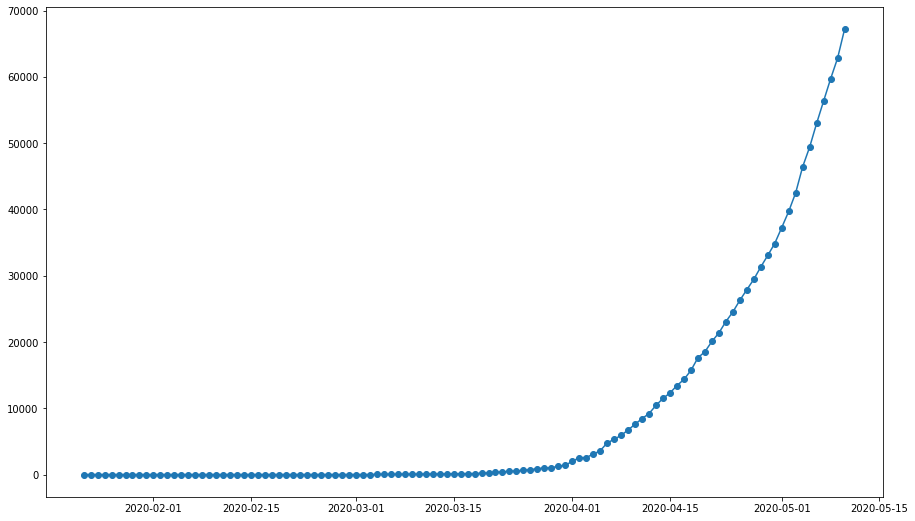

In [15]:
plt.figure(figsize=(15,10))

plt.gcf().autofmt_xdate()
plt.plot_date(confirmed['ds'],confirmed['y'],linestyle='solid')
plt.savefig('growth.png',bbox_inches='tight')
plt.show()

In [16]:
fig = px.line(confirmed, x='ds', y='y')
fig.show()

In [17]:
fig = go.Figure([go.Scatter(x=confirmed['ds'], y=confirmed['y'])])
fig.show()

In [18]:
from statsmodels.tsa.stattools import adfuller
X = confirmed.values
X

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



array([[Timestamp('2020-01-22 00:00:00'), 0],
       [Timestamp('2020-01-23 00:00:00'), 0],
       [Timestamp('2020-01-24 00:00:00'), 0],
       [Timestamp('2020-01-25 00:00:00'), 0],
       [Timestamp('2020-01-26 00:00:00'), 0],
       [Timestamp('2020-01-27 00:00:00'), 0],
       [Timestamp('2020-01-28 00:00:00'), 0],
       [Timestamp('2020-01-29 00:00:00'), 0],
       [Timestamp('2020-01-30 00:00:00'), 1],
       [Timestamp('2020-01-31 00:00:00'), 1],
       [Timestamp('2020-02-01 00:00:00'), 1],
       [Timestamp('2020-02-02 00:00:00'), 2],
       [Timestamp('2020-02-03 00:00:00'), 3],
       [Timestamp('2020-02-04 00:00:00'), 3],
       [Timestamp('2020-02-05 00:00:00'), 3],
       [Timestamp('2020-02-06 00:00:00'), 3],
       [Timestamp('2020-02-07 00:00:00'), 3],
       [Timestamp('2020-02-08 00:00:00'), 3],
       [Timestamp('2020-02-09 00:00:00'), 3],
       [Timestamp('2020-02-10 00:00:00'), 3],
       [Timestamp('2020-02-11 00:00:00'), 3],
       [Timestamp('2020-02-12 00:0

In [0]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
import pandas as pd

In [0]:
ts1 = confirmed.set_index('ds')


In [21]:
ts1

,y
ds,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-05-06,52987
2020-05-07,56351
2020-05-08,59695


In [22]:
ts = ts1['y'] 
ts.head(10)



ds
2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
2020-01-29    0
2020-01-30    1
2020-01-31    1
Name: y, dtype: object

In [23]:
ts['2020-02-22']


3

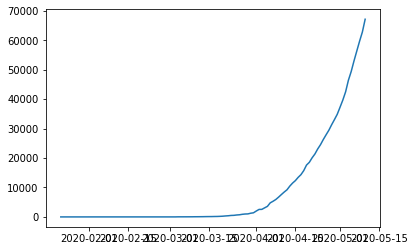

In [24]:
plt.plot(ts)

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    #rolmean = pd.logrolling_mean(timeseries, window=12)
    rolstd =  timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.savefig('init.png')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

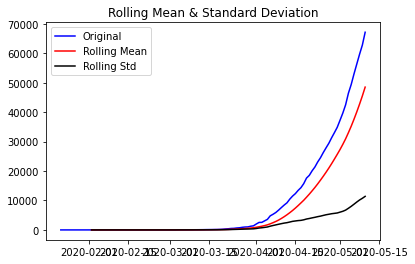

Results of Dickey-Fuller Test:
Test Statistic                   4.263103
p-value                          1.000000
#Lags Used                       2.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [26]:

test_stationarity(ts)
#print("Is the time series stationary? {0}".format(sTest.isStationary))


In [27]:
len(ts)

110

In [0]:
for i in range(0,9):
  ts[i] = 1

In [29]:
ts.head(10)

ds
2020-01-22    1
2020-01-23    1
2020-01-24    1
2020-01-25    1
2020-01-26    1
2020-01-27    1
2020-01-28    1
2020-01-29    1
2020-01-30    1
2020-01-31    1
Name: y, dtype: object

In [30]:
confirmed['y']

1          0
2          0
3          0
4          0
5          0
       ...  
106    52987
107    56351
108    59695
109    62808
110    67161
Name: y, Length: 110, dtype: object

In [0]:
ts_log = []
for i in range(len(ts)):
  ts_log.append(math.log(ts[i]))

In [32]:
con_log = confirmed
con_log['y_log'] = ts_log

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
con_log.drop('y',axis = 1)

,ds,y_log
1,2020-01-22,0.000000
2,2020-01-23,0.000000
3,2020-01-24,0.000000
4,2020-01-25,0.000000
5,2020-01-26,0.000000
...,...,...
106,2020-05-06,10.877802
107,2020-05-07,10.939355
108,2020-05-08,10.997004
109,2020-05-09,11.047838


In [34]:
ts2 = con_log.set_index('ds')
ts_log = ts2['y_log'] 
ts_log.head(10)



ds
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
2020-01-27    0.0
2020-01-28    0.0
2020-01-29    0.0
2020-01-30    0.0
2020-01-31    0.0
Name: y_log, dtype: float64

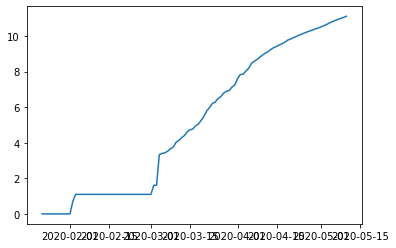

In [35]:
plt.plot(ts_log)

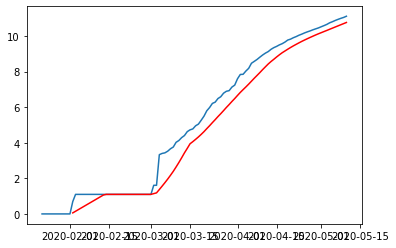

In [36]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.savefig('log.png')

In [37]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

ds
2020-01-22         NaN
2020-01-23         NaN
2020-01-24         NaN
2020-01-25         NaN
2020-01-26         NaN
2020-01-27         NaN
2020-01-28         NaN
2020-01-29         NaN
2020-01-30         NaN
2020-01-31         NaN
2020-02-01         NaN
2020-02-02    0.635385
Name: y_log, dtype: float64

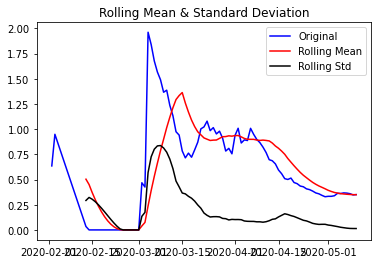

Results of Dickey-Fuller Test:
Test Statistic                 -2.462333
p-value                         0.124910
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64


In [38]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

In [39]:
! pip install pandas

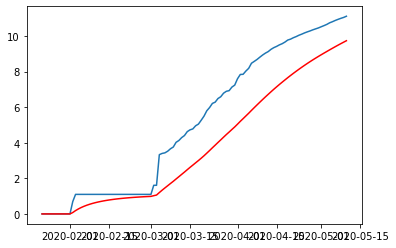

In [40]:

expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')
plt.savefig('diff_log.png')

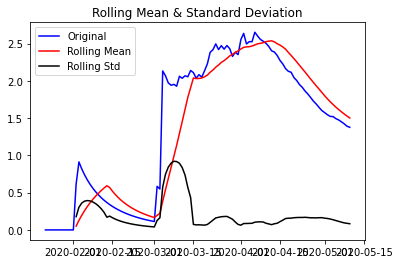

Results of Dickey-Fuller Test:
Test Statistic                  -1.688770
p-value                          0.436908
#Lags Used                       2.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


In [41]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)


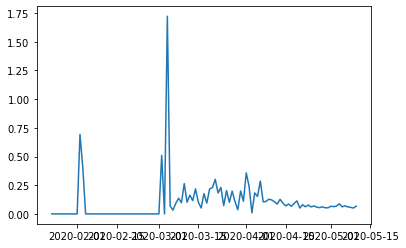

In [42]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

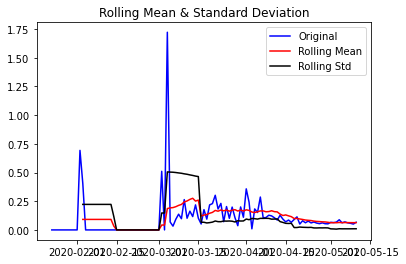

Results of Dickey-Fuller Test:
Test Statistic                -5.681991e+00
p-value                        8.444835e-07
#Lags Used                     1.000000e+00
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [43]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

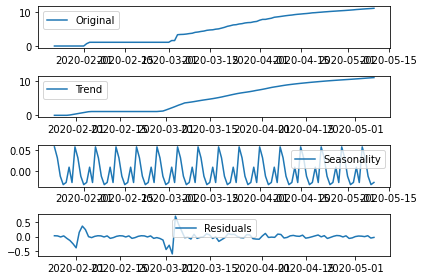

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

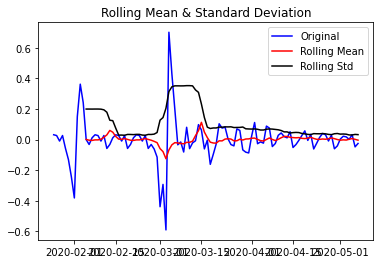

Results of Dickey-Fuller Test:
Test Statistic                -8.195338e+00
p-value                        7.475728e-13
#Lags Used                     2.000000e+00
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


In [45]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [46]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



Text(0.5, 1.0, 'Autocorrelation Function')

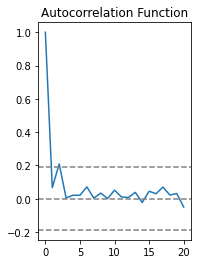

In [47]:
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

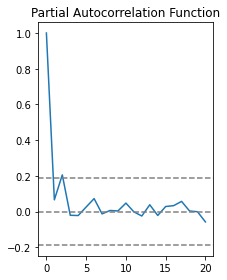

In [48]:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [0]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 3.8057')

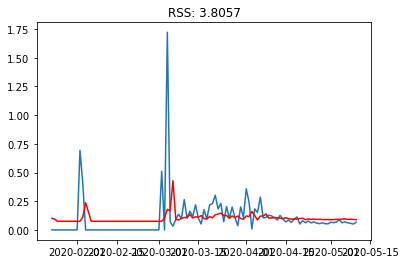

In [50]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 3.7980')

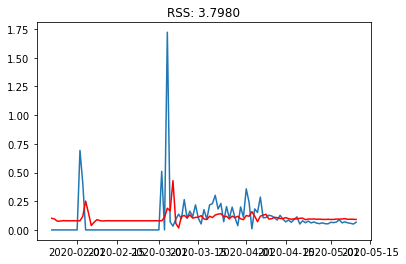

In [51]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Text(0.5, 1.0, 'RSS: 3.7973')

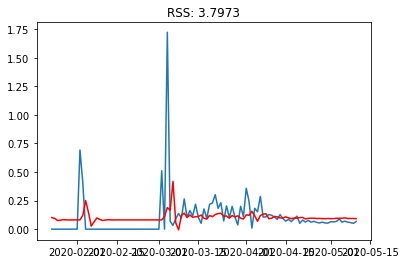

In [52]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 
 
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [53]:
forecast = results_ARIMA.forecast(steps=7)[0]
forecast

array([11.20646872, 11.30340787, 11.40576828, 11.50770155, 11.6091682 ,
       11.71066899, 11.81220993])

In [54]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.tail())

ds
2020-05-06    0.098833
2020-05-07    0.093055
2020-05-08    0.093760
2020-05-09    0.093402
2020-05-10    0.091983
dtype: float64


In [55]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

ds
2020-01-23    0.101535
2020-01-24    0.196457
2020-01-25    0.272641
2020-01-26    0.351045
2020-01-27    0.433959
dtype: float64


In [56]:
predictions_ARIMA_diff_cumsum.tail()

ds
2020-05-06    10.717190
2020-05-07    10.810246
2020-05-08    10.904005
2020-05-09    10.997408
2020-05-10    11.089391
dtype: float64

In [57]:
ts_log.iloc[0]

0.0

In [58]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

ds
2020-01-22    0.000000
2020-01-23    0.101535
2020-01-24    0.196457
2020-01-25    0.272641
2020-01-26    0.351045
dtype: float64

In [59]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0],index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

ds
2020-01-22    0.000000
2020-01-23    0.101535
2020-01-24    0.196457
2020-01-25    0.272641
2020-01-26    0.351045
dtype: float64

Text(0.5, 1.0, 'RMSE: 4276.5725')

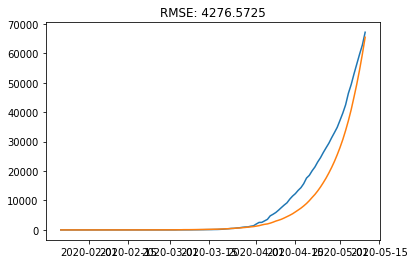

In [60]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [61]:
predictions_ARIMA = np.exp(forecast)
# plt.plot(ts)
# plt.plot(predictions_ARIMA)
# plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))
predictions_ARIMA

array([ 73605.03582364,  81097.53733579,  89838.44524464,  99478.9705216 ,
       110102.62859199, 121864.97965084, 134889.32754982])

In [0]:
def prediction():
  url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
  url_cnf = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
  # for confirmed cases overall
  cnf = uReq(url_cnf)
  pg_cnf = requests.get(url_cnf)
  doc_cnf = lh.fromstring(pg_cnf.content)
  cnf_elements = doc_cnf.xpath('//tr')
  cnf.close()
  # for deaths overall
  client = uReq(url)
  page = requests.get(url)
  doc = lh.fromstring(page.content)
  tr_elements = doc.xpath('//tr')
  client.close()
  # for confirmed cases
  col_cnf=[]
  i=0
  #For each row, store each first element (header) and an empty list
  for t in cnf_elements[0]:
      i+=1
      name=t.text_content()
      #print ('%d:"%s"'%(i,name))
      col_cnf.append((name,[]))
  # for deaths
  col=[]
  i=0
  #For each row, store each first element (header) and an empty list
  for t in tr_elements[0]:
      i+=1
      name=t.text_content()
      #print ('%d:"%s"'%(i,name))
      col.append((name,[]))
  # for confirmed cases

  for j in range(1,len(cnf_elements)):
    T=cnf_elements[j]
    i=0
    for t in T.iterchildren():
          data=t.text_content() 
          if i>0:
          #Convert any numerical value to integers
              try:
                  data=int(data)
              except:
                  pass
          #Append the data to the empty list of the i'th column
          col_cnf[i][1].append(data)
          #Increment i for the next column
          i+=1
    # for deaths 

  for j in range(1,len(tr_elements)):
    T=tr_elements[j]
    i=0
    for t in T.iterchildren():
          data=t.text_content() 
          if i>0:
          #Convert any numerical value to integers
              try:
                  data=int(data)
              except:
                  pass
          #Append the data to the empty list of the i'th column
          col[i][1].append(data)
          #Increment i for the next column
          i+=1

  Dict={title:column for (title,column) in col}
  df=pd.DataFrame(Dict)
  d={title:column for (title,column) in col_cnf}
  cnf=pd.DataFrame(d)
  cnf.to_csv('time_series_cnf.csv')
  cnf.rename(columns={'Country/Region':'Country'}, inplace=True)
  col = ['Country','Lat','Long','Province/State']
  cnf_india = cnf[cnf['Country'] == 'India'].drop(col,axis = 1).transpose().reset_index().drop(0,axis = 0)

  cnf_india.rename(columns = {'index':'Date'}, inplace = True) 
  cnf_india.rename(columns = {131:'Confirmed'}, inplace = True) 
  fin_cnf = cnf_india
  index = fin_cnf.index
  length = len(index)
  for i in range(1,length+1):
    fin_cnf['Date'][i] = str(fin_cnf['Date'][i])
    fin_cnf['Confirmed'][i] = (fin_cnf['Confirmed'][i])
  fin_cnf.columns = ['ds','y']
  fin_cnf['ds'] = pd.to_datetime(fin_cnf['ds'])
  type(fin_cnf['ds'])
  confirmed = fin_cnf

  m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
  m.fit(confirmed)
  future = m.make_future_dataframe(periods=7)
  future.tail()
  forecast = m.predict(future)
  forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

  df.rename(columns={'Country/Region':'Country'}, inplace=True)
  col = ['Country','Lat','Long','Province/State']
  df =  df[df['Country'] == 'India'].drop(col,axis = 1).transpose().reset_index().drop(0,axis = 0)

  df.rename(columns = {'index':'Date'}, inplace = True) 
  df.rename(columns = {131:'Death'}, inplace = True) 

  fin_df = df
  index = df.index
  length = len(index)
  for i in range(1,length+1):
    fin_df['Date'][i] = str(df['Date'][i])
    fin_df['Death'][i] = (df['Death'][i])

  fin_df.columns = ['ds','y']
  fin_df['ds'] = pd.to_datetime(fin_cnf['ds'])

  confirm = fin_df

  m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
  m.fit(confirm)
  future_death = m.make_future_dataframe(periods=7)
  future_death.tail()
  forecast_death = m.predict(future)
  # print(forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
  # print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

  
  index = forecast_death.index
  length1 = len(index)

  death = []
  conf = []

  for i in range(length,length1):
    death.append(forecast_death['yhat_lower'][i])
    conf.append(forecast['yhat_lower'][i])
  print(death)
  print(conf)


In [63]:
prediction()

[2304.8456428903755, 2395.7901918929047, 2470.697671358389, 2529.1173042085684, 2565.339899077223, 2580.9896793446674, 2567.077497746957]
[71311.22862574259, 75485.65029098645, 79815.23062772321, 84168.36595887596, 88451.50209600097, 92751.61646762329, 96941.89134883192]


In [64]:

url = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_cnf = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
# for confirmed cases overall
cnf = uReq(url_cnf)
pg_cnf = requests.get(url_cnf)
doc_cnf = lh.fromstring(pg_cnf.content)
cnf_elements = doc_cnf.xpath('//tr')
cnf.close()
# for deaths overall
client = uReq(url)
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
client.close()
# for confirmed cases
col_cnf=[]
i=0
#For each row, store each first element (header) and an empty list
for t in cnf_elements[0]:
    i+=1
    name=t.text_content()
    #print ('%d:"%s"'%(i,name))
    col_cnf.append((name,[]))
# for deaths
col=[]
i=0
#For each row, store each first element (header) and an empty list
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    #print ('%d:"%s"'%(i,name))
    col.append((name,[]))
# for confirmed cases

for j in range(1,len(cnf_elements)):
  T=cnf_elements[j]
  i=0
  for t in T.iterchildren():
        data=t.text_content() 
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col_cnf[i][1].append(data)
        #Increment i for the next column
        i+=1
  # for deaths 

for j in range(1,len(tr_elements)):
  T=tr_elements[j]
  i=0
  for t in T.iterchildren():
        data=t.text_content() 
        if i>0:
        #Convert any numerical value to integers
            try:
                data=int(data)
            except:
                pass
        #Append the data to the empty list of the i'th column
        col[i][1].append(data)
        #Increment i for the next column
        i+=1

Dict={title:column for (title,column) in col}
df=pd.DataFrame(Dict)
d={title:column for (title,column) in col_cnf}
cnf=pd.DataFrame(d)
cnf.to_csv('time_series_cnf.csv')
cnf.rename(columns={'Country/Region':'Country'}, inplace=True)
col = ['Country','Lat','Long','Province/State']
cnf_india = cnf[cnf['Country'] == 'India'].drop(col,axis = 1).transpose().reset_index().drop(0,axis = 0)

cnf_india.rename(columns = {'index':'Date'}, inplace = True) 
cnf_india.rename(columns = {131:'Confirmed'}, inplace = True) 
fin_cnf = cnf_india
index = fin_cnf.index
length = len(index)
for i in range(1,length+1):
  fin_cnf['Date'][i] = str(fin_cnf['Date'][i])
  fin_cnf['Confirmed'][i] = (fin_cnf['Confirmed'][i])
fin_cnf.columns = ['ds','y']
fin_cnf['ds'] = pd.to_datetime(fin_cnf['ds'])
type(fin_cnf['ds'])


confirmed = fin_cnf.loc[1:length-4,'ds':'y']

act_confirm = fin_cnf.loc[length-3:length,'y']


m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

df.rename(columns={'Country/Region':'Country'}, inplace=True)
col = ['Country','Lat','Long','Province/State']
df =  df[df['Country'] == 'India'].drop(col,axis = 1).transpose().reset_index().drop(0,axis = 0)

df.rename(columns = {'index':'Date'}, inplace = True) 
df.rename(columns = {131:'Death'}, inplace = True) 

fin_df = df
index = df.index
length = len(index)
for i in range(1,length+1):
  fin_df['Date'][i] = str(df['Date'][i])
  fin_df['Death'][i] = (df['Death'][i])

fin_df.columns = ['ds','y']
fin_df['ds'] = pd.to_datetime(fin_cnf['ds'])

confirm = fin_df.loc[1:length-4,'ds':'y']
act_death= fin_df.loc[length-3:length,'y']

m = Prophet(interval_width=0.95,yearly_seasonality=True,daily_seasonality=True)
m.fit(confirm)
future_death = m.make_future_dataframe(periods=7)
future_death.tail()
forecast_death = m.predict(future_death)
# print(forecast_death[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


index = forecast_death.index
length1 = len(index)

death = []
conf = []

for i in range(length,length1):
  death.append(forecast_death['yhat_lower'][i])
  conf.append(forecast['yhat_lower'][i])
print(death)
print(conf)


[2619.053178736157, 2812.455425641579, 3006.866284075575]
[76891.26094046507, 82898.5930445304, 89238.72249127783]


In [65]:
forecast_death

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-3.814657,-13.556366,15.032911,-3.814657,-3.814657,3.916506,3.916506,3.916506,-16.153406,-16.153406,-16.153406,-1.704601,-1.704601,-1.704601,21.774513,21.774513,21.774513,0.0,0.0,0.0,0.101849
1,2020-01-23,13.622817,-11.321440,14.502387,13.622817,13.622817,-12.171314,-12.171314,-12.171314,-16.153406,-16.153406,-16.153406,1.212794,1.212794,1.212794,2.769299,2.769299,2.769299,0.0,0.0,0.0,1.451504
2,2020-01-24,31.060292,-14.610287,12.892384,31.060292,31.060292,-32.280844,-32.280844,-32.280844,-16.153406,-16.153406,-16.153406,-0.677215,-0.677215,-0.677215,-15.450224,-15.450224,-15.450224,0.0,0.0,0.0,-1.220553
3,2020-01-25,48.497766,-15.590819,12.744129,48.497766,48.497766,-49.608036,-49.608036,-49.608036,-16.153406,-16.153406,-16.153406,-0.340572,-0.340572,-0.340572,-33.114059,-33.114059,-33.114059,0.0,0.0,0.0,-1.110270
4,2020-01-26,65.935240,-16.232281,10.156969,65.935240,65.935240,-68.964655,-68.964655,-68.964655,-16.153406,-16.153406,-16.153406,-2.392067,-2.392067,-2.392067,-50.419182,-50.419182,-50.419182,0.0,0.0,0.0,-3.029415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2020-05-09,1991.815673,2255.486901,2283.282591,1991.101637,1992.525301,277.471860,277.471860,277.471860,-16.153406,-16.153406,-16.153406,-0.340572,-0.340572,-0.340572,293.965838,293.965838,293.965838,0.0,0.0,0.0,2269.287534
109,2020-05-10,2012.591679,2428.584592,2458.873287,2011.516925,2013.671944,430.805489,430.805489,430.805489,-16.153406,-16.153406,-16.153406,-2.392067,-2.392067,-2.392067,449.350962,449.350962,449.350962,0.0,0.0,0.0,2443.397169
110,2020-05-11,2033.367686,2619.053179,2645.322361,2031.824829,2034.882322,599.196662,599.196662,599.196662,-16.153406,-16.153406,-16.153406,1.791472,1.791472,1.791472,613.558596,613.558596,613.558596,0.0,0.0,0.0,2632.564348
111,2020-05-12,2054.143692,2812.455426,2840.734022,2052.163212,2056.128414,771.391078,771.391078,771.391078,-16.153406,-16.153406,-16.153406,2.110189,2.110189,2.110189,785.434295,785.434295,785.434295,0.0,0.0,0.0,2825.534771


In [0]:
pred_cnf = forecast.loc[length-3:length,'yhat_lower']
pred_death = forecast_death.loc[length-3:length,'yhat_lower']

In [67]:
pred_cnf

107    61129.566687
108    65964.541989
109    71195.524071
110    76891.260940
Name: yhat_lower, dtype: float64

In [68]:
act_confirm

107    56351
108    59695
109    62808
110    67161
Name: y, dtype: object

In [0]:
import math
from sklearn. metrics import  mean_squared_error as mse
error = mse(act_confirm , pred_cnf)
error1 = mse(act_death, pred_death)
rmse = math. sqrt(error)
rmse_death = math.sqrt(error1)

In [70]:
rmse

7536.086423716962

In [71]:
rmse_death

310.6567100638253